# Imports

In [102]:
import numpy
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from joblib import dump
from joblib import load

# Descargar Dataset

In [75]:
dataset = pd.read_csv('/home/user/machinelearning/imida/data/AL41_valores_imputados.csv')
dataset.head()

,FECHA,CODEST,VVMED,VVMAX,RVIENTO,DVMED,TMIN,TMAX,TMED,TMINABS,...,HSOL,PREC,HORAS0,HORAS7,DEWPT,DPV,ETO_PM_FAO,FECHA_2,AÑO,ESTACION
0,23/04/2010,AL41,1.51,8.23,130.06,145.15,9.74,21.44,16.07,9.250,...,11.0,0.1,0.0,0.0,12.41,0.51,3.010548,2010-04-23,2010.0,PRIMAVERA
1,24/04/2010,AL41,1.64,8.13,141.92,176.62,10.79,25.06,17.78,10.330,...,12.0,0.0,0.0,0.0,11.81,0.74,4.496808,2010-04-24,2010.0,PRIMAVERA
2,25/04/2010,AL41,1.54,8.43,132.96,94.79,11.79,24.97,17.31,11.330,...,10.0,0.0,0.0,0.0,12.08,0.64,3.886669,2010-04-25,2010.0,PRIMAVERA
3,26/04/2010,AL41,1.75,9.11,151.19,130.98,8.98,25.68,17.27,8.420,...,12.0,0.0,0.0,0.0,8.83,0.96,5.082196,2010-04-26,2010.0,PRIMAVERA
4,27/04/2010,AL41,1.92,10.19,165.98,174.00,8.59,28.48,18.05,7.913,...,12.0,0.0,0.0,0.0,8.47,1.14,5.563509,2010-04-27,2010.0,PRIMAVERA


# Crear columnas con las fechas

In [76]:

# convert the date column into a datetime object
dataset['FECHA'] = pd.to_datetime(dataset['FECHA'], format="%d/%m/%Y")

# extract the day, month, and year components
dataset['DIA'] = dataset['FECHA'].dt.day
dataset['MES'] = dataset['FECHA'].dt.month
dataset['AÑO'] = dataset['FECHA'].dt.year

# show the modified data frame
print(dataset.dtypes)


FECHA         datetime64[ns]
CODEST                object
VVMED                float64
VVMAX                float64
RVIENTO              float64
DVMED                float64
TMIN                 float64
TMAX                 float64
TMED                 float64
TMINABS              float64
TMAXABS              float64
HRMIN                float64
HRMAX                float64
HRMED                float64
HRMINABS             float64
HRMAXABS             float64
RADMED               float64
RADMAX               float64
HSOL                 float64
PREC                 float64
HORAS0               float64
HORAS7               float64
DEWPT                float64
DPV                  float64
ETO_PM_FAO           float64
FECHA_2               object
AÑO                    int32
ESTACION              object
DIA                    int32
MES                    int32
dtype: object


# Transformar dataset

## Separar el target

In [77]:
dataset_reducido = dataset.select_dtypes(include=['float64', 'int64', 'int32'])
dataset_reducido['ESTACION'] = dataset['ESTACION']
array = dataset_reducido.values
X = array[:,0:-1]
Y = array[:,-1]

## Estandarizar

In [78]:
standard_scaler = StandardScaler().fit(X)
X_estandarizado = standard_scaler.transform(X)
print(X_estandarizado)

[[-0.78218139 -0.36518946 -0.78794258 ... -1.66239415  0.82398889
  -0.75046034]
 [-0.62288653 -0.40440915 -0.61971062 ... -1.66239415  0.93742643
  -0.75046034]
 [-0.74542103 -0.28675007 -0.7468066  ... -1.66239415  1.05086396
  -0.75046034]
 ...
 [ 0.79851376  0.17212037  0.79820387 ...  1.85184539 -0.99101172
  -1.33082614]
 [ 2.07287264  1.32517941  2.07753269 ...  1.85184539 -0.87757418
  -1.33082614]
 [ 1.10485003 -0.18085689  1.10870956 ...  1.85184539 -0.76413664
  -1.33082614]]


### Guardar dataset

In [79]:
dataset_estandarizado = pd.DataFrame(X_estandarizado, columns=dataset_reducido.drop('ESTACION', axis=1).columns)
dataset_estandarizado['ESTACION'] = dataset_reducido['ESTACION']
dataset_estandarizado.to_csv('/home/user/machinelearning/imida/data/AL41_estandarizado.csv')

## Normalizar

In [80]:
normalizer_scaler = Normalizer().fit(X)
X_normalizado = normalizer_scaler.transform(X)
print(X_normalizado)

[[6.24578710e-04 3.40416078e-03 5.37964947e-02 ... 8.31392852e-01
  9.51345055e-03 1.65451314e-03]
 [6.86312661e-04 3.40226947e-03 5.93911542e-02 ... 8.41151493e-01
  1.00435999e-02 1.67393332e-03]
 [6.79451828e-04 3.71933695e-03 5.86622825e-02 ... 8.86816996e-01
  1.10300621e-02 1.76480994e-03]
 ...
 [1.23911045e-03 4.24837870e-03 1.07041442e-01 ... 8.94372224e-01
  3.09777613e-03 8.85078896e-04]
 [1.71744057e-03 5.60851686e-03 1.48518357e-01 ... 9.03892550e-01
  3.57800119e-03 8.94500297e-04]
 [1.45920146e-03 4.16231236e-03 1.26194613e-01 ... 9.66900376e-01
  4.30584037e-03 9.56853415e-04]]


### Guardar dataset

In [81]:
dataset_normalizado = pd.DataFrame(X_normalizado, columns=dataset_reducido.drop('ESTACION', axis=1).columns)
dataset_normalizado['ESTACION'] = dataset_reducido['ESTACION']
dataset_normalizado.to_csv('/home/user/machinelearning/imida/data/AL41_normalizado.csv')

# Evaluar algoritmos Estandarización

## Separar Entrenamiento-Prueba

In [82]:
validation_size = 0.20
seed = 7
X_train_E, X_validation_E, Y_train_E, Y_validation_E = train_test_split(X_estandarizado, Y, test_size=validation_size, random_state=seed, shuffle=False)

## Establecimiento de valores para el entrenamiento

In [83]:
num_folds = 10
seed = 7
scoring = 'accuracy'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

## Creación de modelos

### Logistic Regression

In [84]:
result_lr_e = cross_val_score(LogisticRegression(max_iter=500), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_lr_e.mean(), result_lr_e.std())

0.9011422543701025 0.013497202351760567


### Linear discriminant analysis

In [85]:
result_lda_e = cross_val_score(LinearDiscriminantAnalysis(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_lda_e.mean(), result_lda_e.std())

0.8973417721518988 0.012746206154006264


### k-nearest neighbors

In [86]:
result_knn_e = cross_val_score(KNeighborsClassifier(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_knn_e.mean(), result_knn_e.std())

0.897021297970665 0.008046092183462996


### Classification tree

In [87]:
result_cart_e = cross_val_score(DecisionTreeClassifier(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_cart_e.mean(), result_cart_e.std())

0.9898643761301988 0.005258709046199353


#### Despues de tunear

In [98]:
result_cart_e = cross_val_score(DecisionTreeClassifier(max_depth=18, min_samples_split=10, min_samples_leaf=1), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_cart_e.mean(), result_cart_e.std())

0.9901808318264014 0.0055622862557908395


### Gaussian naive Bayes

In [89]:
result_gnb_e = cross_val_score(GaussianNB(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_gnb_e.mean(), result_gnb_e.std())

0.7525336548121359 0.01769928536926431


### Support vector machine

In [90]:
result_svc_e = cross_val_score(SVC(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_svc_e.mean(), result_svc_e.std())

0.9195187864175207 0.011082365421168845


### Boxplot

Vemos que el que mejor funciona es el DecisionTreeClassifier (CART)

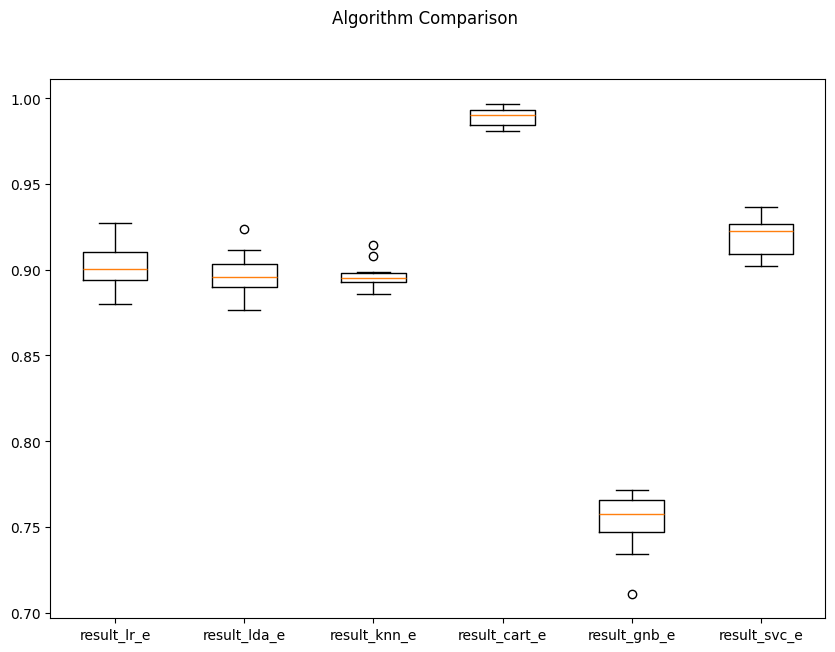

In [91]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot([result_lr_e, result_lda_e, result_knn_e, result_cart_e, result_gnb_e, result_svc_e])
ax.set_xticklabels(['result_lr_e', 'result_lda_e', 'result_knn_e', 'result_cart_e', 'result_gnb_e', 'result_svc_e'])
plt.show()

## Tunear Decision tree classifier

La mejor combinación es un ***max_depth*** de 11, un ***min_samples_leaf*** de 2 y un ***min_samples_split*** de 9. Lo voy comentar porque sino cada vez que haga un ***run all*** se tarda demasiado aquí

In [97]:

param_grid = dict(max_depth=range(9, 20), min_samples_split=range(9,20), min_samples_leaf=range(1,3))
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_E, Y_train_E)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.991132 using {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.989230 (0.006039) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 9}
0.989862 (0.005066) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.990182 (0.006080) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 11}
0.988276 (0.008400) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 12}
0.988593 (0.007399) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 13}
0.987641 (0.006870) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 14}
0.988594 (0.005879) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.988593 (0.006530) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 16}
0.987006 (0.006872) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 17}
0.987641 (0.006570) with: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 18}
0.98

/home/user/machinelearning/env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Ensemble methods

### Random forest

In [93]:
result_rf_e = cross_val_score(RandomForestClassifier(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_rf_e.mean(), result_rf_e.std())

0.9702169981916817 0.00951204373646777


### Extra trees

In [94]:
result_et_e = cross_val_score(ExtraTreesClassifier(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_et_e.mean(), result_et_e.std())

0.9569077757685353 0.008030864920469418


### Gradient boosting

In [95]:
result_gb_e = cross_val_score(GradientBoostingClassifier(), X_train_E, Y_train_E, cv=kfold, scoring=scoring)
print(result_gb_e.mean(), result_gb_e.std())

1.0 0.0


### Boxplot

Gradient Boostin tira de puta madre

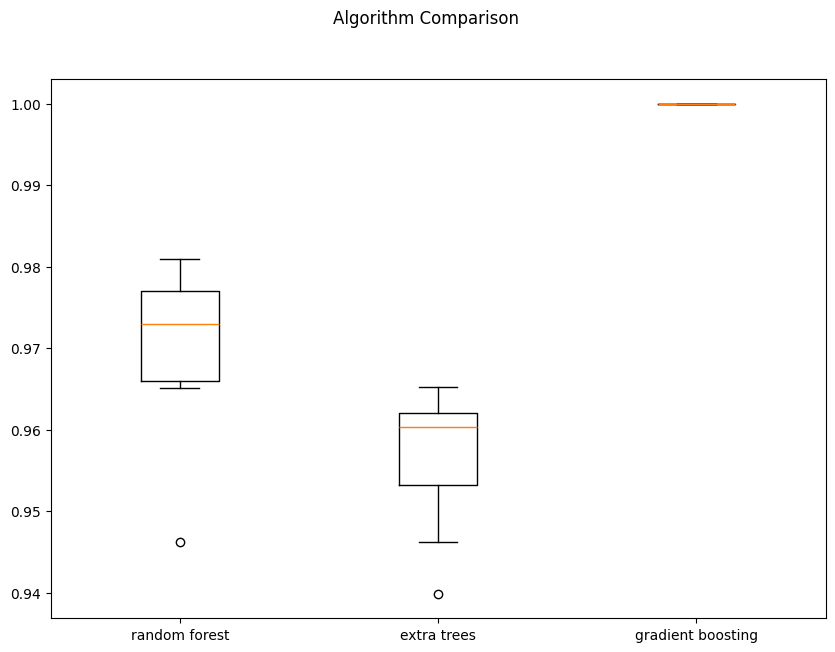

In [96]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot([result_rf_e, result_et_e, result_gb_e])
ax.set_xticklabels(['random forest', 'extra trees', 'gradient boosting'])
plt.show()

## Validación

He decidido usar CART porque da muy buenos resultados y tarda mucho menos en converger que gradient boosting

In [103]:
model_E = DecisionTreeClassifier(max_depth=18, min_samples_leaf=1, min_samples_split=10)
model_E.fit(X_train_E, Y_train_E)
predictions_E = model_E.predict(X_validation_E)
print(accuracy_score(Y_validation_E, predictions_E))
print(confusion_matrix(Y_validation_E, predictions_E))
print(classification_report(Y_validation_E, predictions_E))

0.9873417721518988
[[229   0   0   0]
 [  0 185   0   4]
 [  0   0 184   0]
 [  0   6   0 182]]
              precision    recall  f1-score   support

    INVIERNO       1.00      1.00      1.00       229
       OTOÑO       0.97      0.98      0.97       189
   PRIMAVERA       1.00      1.00      1.00       184
      VERANO       0.98      0.97      0.97       188

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790



## Guardar modelo y escalado

### Modelo

In [104]:
filename = 'Standard_model.sav'
dump(model_E, filename)

['Standard_model.sav']

### Escalado

In [117]:
filename_scaler = 'Standard_scaler.sav'
dump(standard_scaler, filename)

['Normalized_model.sav']

# Evaluar algoritmos normalizacion

## Separar Dataset

In [105]:
validation_size = 0.20
seed = 7
X_train_N, X_validation_N, Y_train_N, Y_validation_N = train_test_split(X_normalizado, Y, test_size=validation_size, random_state=seed, shuffle=False)

## Creación de modelos

### Logistic Regression

In [106]:
result_lr_n = cross_val_score(LogisticRegression(max_iter=500), X_train_N, Y_train_N, cv=kfold, scoring=scoring)
print(result_lr_n.mean(), result_lr_n.std())

0.5865159734779988 0.02583528444182246


### Linear DiscriminantAnalysis

In [107]:
result_lda_n = cross_val_score(LinearDiscriminantAnalysis(), X_train_N, Y_train_N, cv=kfold, scoring=scoring)
print(result_lda_n.mean(), result_lda_n.std())

0.8957554751858549 0.013096186034957515


### K-neighbors

In [108]:
result_knn_n = cross_val_score(KNeighborsClassifier(), X_train_N, Y_train_N, cv=kfold, scoring=scoring)
print(result_knn_n.mean(), result_knn_n.std())

0.6844072734579064 0.015073653150707135


### Classification Tree

In [109]:
result_cart_n = cross_val_score(DecisionTreeClassifier(), X_train_N, Y_train_N, cv=kfold, scoring=scoring)
print(result_cart_n.mean(), result_cart_n.std())

0.9860628892907375 0.005864963157326925


### Gaussian naive Bayes

In [111]:
result_gnb_n = cross_val_score(GaussianNB(), X_train_N, Y_train_N, cv=kfold, scoring=scoring)
print(result_gnb_n.mean(), result_gnb_n.std())

0.8019680530440023 0.02082199135408723


### Support vector machines

In [112]:
result_svc_n = cross_val_score(SVC(), X_train_N, Y_train_N, cv=kfold, scoring=scoring)
print(result_svc_n.mean(), result_svc_n.std())

0.5947598955193891 0.026632284516884572


### Boxplot

Una vez más el que mejor se comporta es el DecisionTree

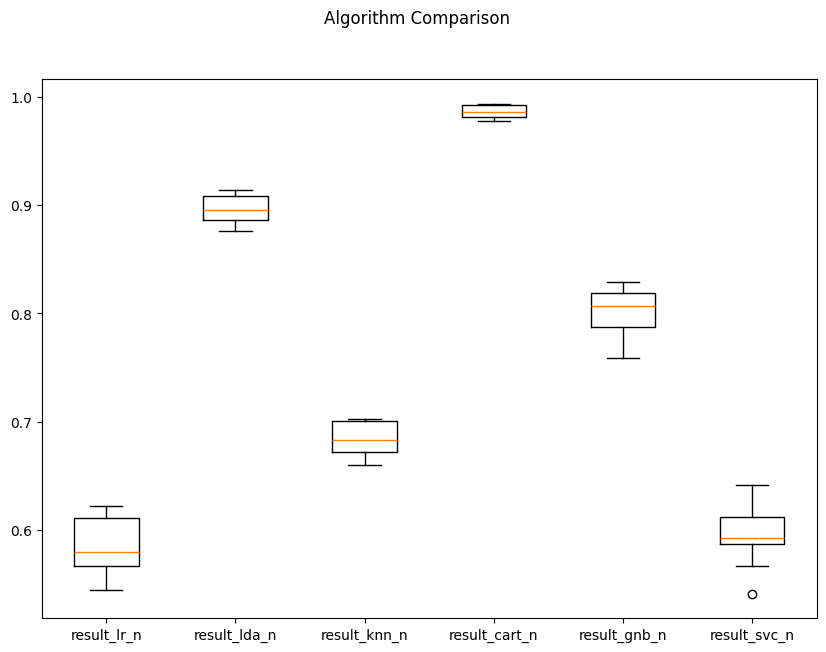

In [113]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot([result_lr_n, result_lda_n, result_knn_n, result_cart_n, result_gnb_n, result_svc_n])
ax.set_xticklabels(['result_lr_n', 'result_lda_n', 'result_knn_n', 'result_cart_n', 'result_gnb_n', 'result_svc_n'])
plt.show()

## Validación

In [114]:
model_N = DecisionTreeClassifier(max_depth=18, min_samples_leaf=1, min_samples_split=10)
model_N.fit(X_train_N, Y_train_N)
predictions_N = model_N.predict(X_validation_N)
print(accuracy_score(Y_validation_N, predictions_N))
print(confusion_matrix(Y_validation_N, predictions_N))
print(classification_report(Y_validation_N, predictions_N))

0.9886075949367089
[[228   0   1   0]
 [  1 185   0   3]
 [  1   0 183   0]
 [  0   3   0 185]]
              precision    recall  f1-score   support

    INVIERNO       0.99      1.00      0.99       229
       OTOÑO       0.98      0.98      0.98       189
   PRIMAVERA       0.99      0.99      0.99       184
      VERANO       0.98      0.98      0.98       188

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790



## Guardar modelo y escalado

### Modelo

In [115]:
filename = 'Normalized_model.sav'
dump(model_N, filename)

['Normalized_model.sav']

### Escalado

In [118]:
filename_scaler = 'Normalized_scaler.sav'
dump(normalizer_scaler, filename)

['Normalized_model.sav']